## Data Prep
Let's read in the CA Housing data and subset a few columns to make things more intuitive.



In [ ]:
theSeed = 1234567 

In [ ]:
import pandas as pd
import numpy as np
# read in the CA Housing data
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.info() # note that this version only has a few columns (RM, LSTAT, PTRATIO and MEDV)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
df = df[['housing_median_age', 'total_rooms', 'median_income', 'median_house_value']]

In [ ]:
df['housing_median_age'] = np.where(df['housing_median_age'] > np.median(df['housing_median_age']), 1, 0)
df['total_rooms'] = np.where(df['total_rooms'] > np.median(df['total_rooms']), 1, 0)
df['median_income'] = np.where(df['median_income'] > np.median(df['median_income']), 1, 0)
df # we leave the target variable as is, we are doing regression!

,housing_median_age,total_rooms,median_income,median_house_value
0,0,1,0,66900.0
1,0,1,0,80100.0
2,0,0,0,85700.0
3,0,0,0,73400.0
4,0,0,0,65500.0
...,...,...,...,...
16995,1,1,0,111400.0
16996,1,1,0,79000.0
16997,0,1,0,103600.0
16998,0,1,0,85800.0


In [ ]:
# sample 10 rows
df = df.sample(n=10, random_state=theSeed)

# clean up your dataframe
df.reset_index(inplace=True)
del df['index']

# check your work
df

,housing_median_age,total_rooms,median_income,median_house_value
0,1,1,1,337000.0
1,0,0,1,227800.0
2,1,1,1,223500.0
3,0,1,0,272800.0
4,0,1,1,167600.0
5,0,1,1,294600.0
6,0,0,0,75300.0
7,0,1,1,183200.0
8,0,0,0,93400.0
9,1,1,1,168800.0


# Part 1: Regression tree from scratch

## Global Standard Deviation ($\Phi = $79604.38)



In [ ]:
np.mean(df['median_house_value'])

204400.0

In [ ]:
np.std(df['median_house_value'])

79604.38430136873

So now we are going to split where we can reduce our global standard deviation $\Phi = 79604.38$. Reducing the global standard deviation means our model is becoming more accurate.

# The first split values
To determine the best split, we will go through all of the columns one by one. For each column, we look at all the possible options for splitting.

We will consider:
* **`housing_median_age`** - has two different categories for splitting (0, 1)
* **`total_rooms`** - has two categories for splitting (0,1)
* **`median_income`** - has two categories for splitting (0,1)

This means that there are many possible options for splitting - YIKES! We will tackle these one by one and try to stay organized.

We will start with `housing_median_age` and calculate the standard deviation of `median_house_value` that results from the various splits. 
Our goal is to decrease global standard deviation. If we have a lower standard deviation, we have more similar observations - and that means we have found a good split!

##	housing_median_age


housing_median_age is a binary class. It can either be 0 or 1.We will calculate standard deviations for those values. Further, will calculate what the reduction in global standard deivation is.


### 0 housing_median_age ($\sigma = 77669.67$, $n =7$)
The standard deviation for `0` is 77669.67$

We subset data that belongs to this category `df.loc[df.housing_median_age == '0']` and calcuate the standard deviation. We will need to keep track of this value. 

In [ ]:
### 0 housing_median_age
Count0 = df.loc[df.housing_median_age == 0]
Count0

,housing_median_age,total_rooms,median_income,median_house_value
1,0,0,1,227800.0
3,0,1,0,272800.0
4,0,1,1,167600.0
5,0,1,1,294600.0
6,0,0,0,75300.0
7,0,1,1,183200.0
8,0,0,0,93400.0


In [ ]:
avg_Count0_players = np.mean(Count0['median_house_value'])
std_Count0_players = np.std(Count0['median_house_value'])
print(avg_Count0_players)
print(std_Count0_players)

187814.2857142857
77669.67469577132


### 1 housing_median_age ($\sigma = 70052.02$, $n =3$)
The standard deviation for `1` is 70052.02.

We subset data that belongs to this category `df.loc[df.housing_median_age == '1']` and calcuate the standard deviation. We will need to keep track of this value. 

In [ ]:
# 1 housing_median_age
Count1 = df.loc[df.housing_median_age== 1]
Count1

,housing_median_age,total_rooms,median_income,median_house_value
0,1,1,1,337000.0
2,1,1,1,223500.0
9,1,1,1,168800.0


In [ ]:
avg_Count1_players = np.mean(Count1['median_house_value'])
std_Count1_players = np.std(Count1['median_house_value'])
print(avg_Count1_players)
print(std_Count1_players)

243100.0
70052.02828374541


### Summary ($\phi = 4220.01$)
Let's use $\phi$ to represent the Value reduction in global standard deviation, $\Phi$.

$\text{Weighted standard deviation for housing_median_age} = (7/10) \times 77669.67 + (3/10)\times 79604.38  = 75384.37$

We have calculated the global standard deviation ($\Phi$) of median_house_value was $79604.38$ in previous steps. Standard deviation reduction is difference of the global standard deviation and standard deviation for current feature. In this way, maximized standard deviation reduction will be the decision node.

$\text{Standard deviation reduction for housing_median_age} = \phi = 79604.38 – 75384.375 = $4220.01

or more compactly.... $\phi = $4220.01

In [ ]:
7/10 * 77669.67 + 3/10 * 70052.02

75384.375

In [ ]:
79604.38 - 75384.37

4220.010000000009

## total_rooms

total_rooms is a binary class. It can either be 0 or 1.We will calculate standard deviations for those values.


###0 rooms ($\sigma = $68025.50, $n=$3)

In [ ]:
# Count 0 of total_rooms
Count0_rooms = df.loc[df['total_rooms'] == 0]
Count0_rooms

,housing_median_age,total_rooms,median_income,median_house_value
1,0,0,1,227800.0
6,0,0,0,75300.0
8,0,0,0,93400.0


In [ ]:
avg_Count0_rooms_players = np.mean(Count0_rooms['median_house_value'])
std_Count0_rooms_players = np.std(Count0_rooms['median_house_value'])
std_Count0_rooms_players

68025.50175403993

###1 rooms ($\sigma = $62249.26, $n=$7)

In [ ]:
# Count 0 of total_rooms
Count1_rooms = df.loc[df['total_rooms'] == 1]
print(Count1_rooms)
len(Count1_rooms)

   housing_median_age  total_rooms  median_income  median_house_value
0                   1            1              1            337000.0
2                   1            1              1            223500.0
3                   0            1              0            272800.0
4                   0            1              1            167600.0
5                   0            1              1            294600.0
7                   0            1              1            183200.0
9                   1            1              1            168800.0


7

In [ ]:
avg_Count1_rooms_players = np.mean(Count1_rooms['median_house_value'])
std_Count1_rooms_players = np.std(Count1_rooms['median_house_value'])
std_Count1_rooms_players

62249.265219825385

### Summary ($\phi = $15622.25)

$\text{Weighted standard deviation for total_rooms} = (3/10) \times 68025.50 + (7/10) \times 62249.26 = $63982.13

$\text{Standard deviation reduction for total_rooms} = \phi = 79604.38–63982.13 = 15622.25$

In [ ]:
(3/10) *68025.50 + (7/10)*62249.26 

63982.132

In [ ]:
79604.38-63982.13

15622.250000000007

##median_income 

median_income  is a binary class. It can either be 0 or 1.


### 0 Median ($\sigma = $89142.96, $n=$3)

In [ ]:
# 0 median_income
Count0_median_income = df.loc[df['median_income'] == 0]
Count0_median_income

,housing_median_age,total_rooms,median_income,median_house_value
3,0,1,0,272800.0
6,0,0,0,75300.0
8,0,0,0,93400.0


In [ ]:
avg_Count0_median_income = np.mean(Count0_median_income['median_house_value'])
std_Count0_median_income = np.std(Count0_median_income['median_house_value'])
std_Count0_median_income

89142.96881352387

### 1 median_income ($\sigma = $60345.02, $n=7$)

In [ ]:
# high humidity
Count1_median_income = df.loc[df['median_income'] == 1]
Count1_median_income

,housing_median_age,total_rooms,median_income,median_house_value
0,1,1,1,337000.0
1,0,0,1,227800.0
2,1,1,1,223500.0
4,0,1,1,167600.0
5,0,1,1,294600.0
7,0,1,1,183200.0
9,1,1,1,168800.0


In [ ]:
avg_Count1_median_income = np.mean(Count1_median_income['median_house_value'])
std_Count1_median_income = np.std(Count1_median_income['median_house_value'])
std_Count1_median_income

60345.02498811585

### Summary ($\phi = 10619.98$)

$\text{Weighted standard deviation for median_income} = (3/10) \times 89142.96 + (7/10) \times 60345.02 = 68984.402$

$\text{Standard deviation reduction for median_income} = 79604.38 - 68984.40 = 10619.98$

In [ ]:
3/10 * 89142.96 + 7/10 * 60345.02

68984.402

In [ ]:
79604.38 - 68984.40

10619.98000000001

# And the first split is... `total_rooms`!
Because it has the largest decrease in global standard deviation, $\phi = 15622.25$.

So this tells us it is the best value to split the data.

## Visualization of the first-split tree

Because Standard deviation reduction of `total_rooms` is the highest reduction is standard deviation, we split the first node by `total_rooms`.

In [ ]:
# import module
from sklearn.tree import DecisionTreeRegressor 

# encode variables to fit them into model
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

# when we have categorical data, we can use LabelEncoder()
df['housing_median_age'] = Le.fit_transform(df['housing_median_age'])
df['total_rooms'] = Le.fit_transform(df['total_rooms'])
df['median_income'] = Le.fit_transform(df['median_income'])

# check your work! see how the labels take on numeric values?
df

,housing_median_age,total_rooms,median_income,median_house_value
0,1,1,1,337000.0
1,0,0,1,227800.0
2,1,1,1,223500.0
3,0,1,0,272800.0
4,0,1,1,167600.0
5,0,1,1,294600.0
6,0,0,0,75300.0
7,0,1,1,183200.0
8,0,0,0,93400.0
9,1,1,1,168800.0


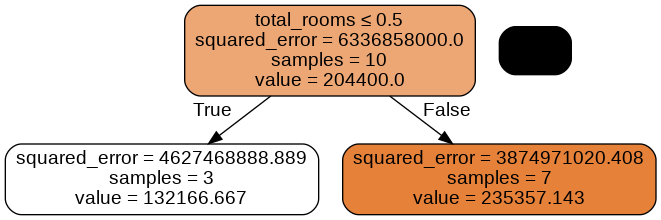

In [ ]:
# specify X and Y
y = df['median_house_value']
X = df[['housing_median_age', 'total_rooms'	,'median_income']]

# Making a variable to store the general model
DTR = DecisionTreeRegressor(max_depth=1, max_leaf_nodes=2) # only let it do the first split!

# fit the model 
DTR = DTR.fit(X, y)

# To show the tree
from sklearn.tree import export_graphviz
from six import StringIO # updated
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(DTR, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

So, when `total_rooms == 0` (same things as `total_rooms` $\leq$ `0.5`, which happens to be '0'), then 132166.66 is the median_house_value . Otherwise, if false, 235357.14 is the median_house_value! This was the best split. It resulted in the largest decrease in the global standard deviation. 

In [ ]:
# pssst.... sd = sqrt(mse)
# here is the value of the left node (which is the same as the Rainy sd!)
np.sqrt(4627468888.88)

# make sure you see this value on the tree!

68025.50175397459

In [ ]:
# the value of the right node is for Sunny
np.sqrt(3874971020.408) # look at the subheader and validate!


62249.26521982408